In [1]:
#モジュールの読み込み
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [29]:
data = load_boston()

In [30]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [31]:
#pandasのDataFrame型へ
df = pd.DataFrame(data.data, columns=data.feature_names)

In [32]:
df["y"] = data.target

今回は擬似的にマルチコを起こしたいため相関係数が高いカラムを作成

In [33]:
size = df.shape[0]
size

506

In [34]:
#targetに近いデータを作成
noize = np.random.uniform(-3,3,size) #-3~3の一様分布作成

In [35]:
#noizeとtargetでカラムを作成
df["target_lag1"] = data.target + noize

In [36]:
#上記処理を後2回繰り返す
noize2 = np.random.uniform(-4,4,size) #-4~4の一様分布作成
df["target_lag2"] = data.target + noize2

noize3 = np.random.uniform(-5,5,size) #-5~5の一様分布作成
df["target_lag3"] = data.target + noize3

In [37]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y,target_lag1,target_lag2,target_lag3
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.372758,-0.395047,-0.365691
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.359596,0.358440,0.323081
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.487209,-0.469602,-0.446172
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.171963,0.156774,0.202720
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.435867,-0.415021,-0.407288
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.684050,0.675469,0.655130
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.384271,-0.383848,-0.364445
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.258041,0.248628,0.229763
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.379890,-0.366821,-0.363073
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.469513,-0.451395,-0.437257


0.9以上の相関を作れている

前処理

In [38]:
# 行列の標準化
dfs = df.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y,target_lag1,target_lag2,target_lag3
0,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,0.159528,-0.041794,-0.076869,-0.093593
1,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,-0.101424,0.074554,0.168198,-0.395660
2,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,1.322937,1.357167,0.939950,1.351536
3,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,1.181589,1.224779,1.271315,1.516821
4,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,1.486032,1.339833,1.434647,1.211513


学習

In [39]:
#データセット作成
X = dfs.drop("y", axis=1).values
y = dfs["y"].values

#データセットを分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [40]:
#モデル設計
model = LinearRegression()

#モデル学習
model.fit(X_train, y_train)

LinearRegression()

In [41]:
#結果の出力
print("学習データ：", model.score(X_train,y_train))
print("学習データ：", model.score(X_test,y_test))

学習データ： 0.9832240026173332
学習データ： 0.9840582857725751


In [44]:
# 偏回帰係数
df_coef = pd.DataFrame(model.coef_.reshape(1,15),columns=dfs.drop("y", axis=1).columns)
print(df_coef)

         ZN     INDUS      CHAS       NOX        RM       AGE       DIS  \
0  0.011719  0.011328  0.000077 -0.005596  0.021636  0.025027 -0.008005   

        RAD       TAX  PTRATIO         B     LSTAT  target_lag1  target_lag2  \
0  0.021732 -0.027783 -0.01826  0.030272 -0.020081     0.497043     0.276295   

   target_lag3  
0      0.19194  


VIFを計算する
※参考　https://betashort-lab.com/%E3%83%87%E3%83%BC%E3%82%BF%E3%82%B5%E3%82%A4%E3%82%A8%E3%83%B3%E3%82%B9/%E7%B5%B1%E8%A8%88%E5%AD%A6/python%E3%81%A7vif-variance_inflation_factor/

In [45]:
#statsmodelsのvifをインポート
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
#vifを計算
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif["columns"] = dfs.drop("y",axis=1).columns

In [47]:
#結果を出力
print(vif)

    VIF Factor      columns
0     2.323337           ZN
1     3.991567        INDUS
2     1.114606         CHAS
3     4.575478          NOX
4     2.239242           RM
5     3.113182          AGE
6     4.270304          DIS
7     7.164719          RAD
8     9.239753          TAX
9     1.986067      PTRATIO
10    1.376113            B
11    3.505582        LSTAT
12   15.048121  target_lag1
13   12.444138  target_lag2
14    9.278493  target_lag3


In [ ]:
#vifを棒グラフでぷrpっtp
plt.bar(x = vif["columns"], height = vif["VIF Factor"])

target_lag1,2がvifで一般的に言われている基準である１０を超えている

相関を確認した際にはマルチコを警戒するような高い相関(0.9以上)あったtarget_lagの内3のみ10を下回った

マルチコ解消に向けて下記の３パターンを実施してみる

1.説明変数の削減

2.主成分分析

3.正規化

まずは説明変数の削減から

In [48]:
#dfをコピー
df1 = df.copy()

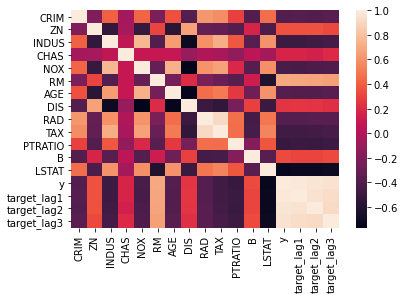

In [49]:
#相関行列の確認
sns.heatmap(df1.corr())

In [60]:
#target_lag2を削除して計算
X = dfs.drop(["target_lag2","y"], axis=1)

In [61]:
#vifを計算
vif_try1 = pd.DataFrame()
vif_try1["VIF Factor"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif_try1["columns"] = X.columns

In [62]:
print(vif_try1)

    VIF Factor      columns
0     2.319126           ZN
1     3.990294        INDUS
2     1.110578         CHAS
3     4.573617          NOX
4     2.227571           RM
5     3.103473          AGE
6     4.261050          DIS
7     7.154567          RAD
8     9.231690          TAX
9     1.972095      PTRATIO
10    1.375285            B
11    3.496777        LSTAT
12    9.433703  target_lag1
13    8.562942  target_lag3


lag2を消すことで全て１０以下になった

In [63]:
#データセット作成
X = dfs.drop(["target_lag2","y"], axis=1).values
y = dfs["y"].values

#データセットを分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [64]:
#モデル設計
model = LinearRegression()

#モデル学習
model.fit(X_train, y_train)

LinearRegression()

In [65]:
#結果の出力
print("学習データ：", model.score(X_train,y_train))
print("学習データ：", model.score(X_test,y_test))

学習データ： 0.9773763442742891
学習データ： 0.9769055623827426


精度は若干下がった

続いて主成分分析を実行してみる

In [67]:
from sklearn.decomposition import PCA

In [101]:
df_1 = dfs.copy()

In [102]:
#target_lagのみ切り出し
target_lag = df_1[["target_lag1","target_lag2","target_lag3"]]

In [103]:
#主成分分析の実行
pca = PCA()
pca.fit(target_lag)
# データを主成分空間に写像
feature = pca.transform(target_lag)

In [104]:
# 主成分得点
pca_target_lag = pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(target_lag.columns))])
pca_target_lag.head()

,PC1,PC2,PC3
0,-0.122387,-0.022997,-0.030129
1,-0.086648,-0.427256,-0.018435
2,2.106345,0.228418,-0.251385
3,2.315871,0.217289,0.081215
4,2.301771,-0.145315,0.043173


In [105]:
#値を変える
df_1["target_lag1"] = pca_target_lag["PC1"]
df_1["target_lag2"] = pca_target_lag["PC2"]
df_1["target_lag3"] = pca_target_lag["PC3"]

In [107]:
#データセット作成
X = df_1.drop(["target_lag2","target_lag3","y"], axis=1).values
y = df_1["y"].values

#データセットを分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [108]:
#モデル設計
model = LinearRegression()

#モデル学習
model.fit(X_train, y_train)

LinearRegression()

In [109]:
#結果の出力
print("学習データ：", model.score(X_train,y_train))
print("学習データ：", model.score(X_test,y_test))

学習データ： 0.9808374733164493
学習データ： 0.9829082174891176


In [114]:
model.coef_

array([ 0.01669487,  0.00432874, -0.00466779, -0.00653542,  0.02616499,
        0.02791485, -0.01211229,  0.02855198, -0.04235013, -0.01665983,
        0.02596908, -0.01771644,  0.55382252])

target_lagの３つを主成分分析にかけ、特徴を持ってきたPC1のみ与えてみたところ若干精度が下がった

次は正規化してやってみる

In [94]:
from sklearn.linear_model import Ridge

In [96]:
#データセット作成
X = dfs.drop("y", axis=1).values
y = dfs["y"].values

#データセットを分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [97]:
#モデル設計
ridge = Ridge()

#学習
ridge.fit(X_train, y_train)

Ridge()

In [98]:
#結果の出力
print("学習データ：", model.score(X_train,y_train))
print("学習データ：", model.score(X_test,y_test))

学習データ： 0.4900907460050793
学習データ： 0.489924993647888


精度がかなり下がった

In [115]:
ridge.coef_

array([ 1.20511294e-02,  1.04704731e-02,  2.68313958e-04, -6.09098163e-03,
        2.29292973e-02,  2.47512870e-02, -9.27812122e-03,  2.14517181e-02,
       -2.79491188e-02, -1.88211848e-02,  3.00782025e-02, -2.11149687e-02,
        4.84929161e-01,  2.79797566e-01,  1.96861815e-01])

今回はマルチコに対する各種対処方法を実践してみた。

予測精度を上げるだけであれば主成分分析、何もしないのが一番良い結果となった。

今回、train,testのみであり汎化性能の変化まではみれていないため、汎化性能が改善している可能性は十分にあると感じた。

また、最後正規化をおこなった際に値が低くなった理由を検討したい。

ValueError: shape mismatch: objects cannot be broadcast to a single shape

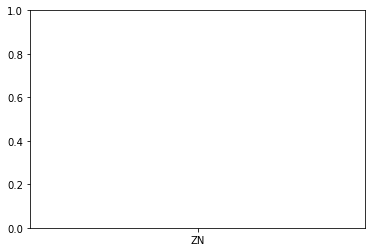

In [113]:
plt.bar(x=df_1_col, height=model.coef_)
plt.set_title('Linear Regression')